In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

import pulp

print(pulp.__version__)

In [ ]:
from pulp import *

In [ ]:
Mateusz Kociołek 215276  7AiR4

# zadanie 1
Podczas tego zadania wykonaliśy analizę układu elektrycznego w celu określenia maksymalnych wartości prądów dla poszczególnych gałęzi układu. 
Schemat układu został przedstawiony na rysunku poniżej:
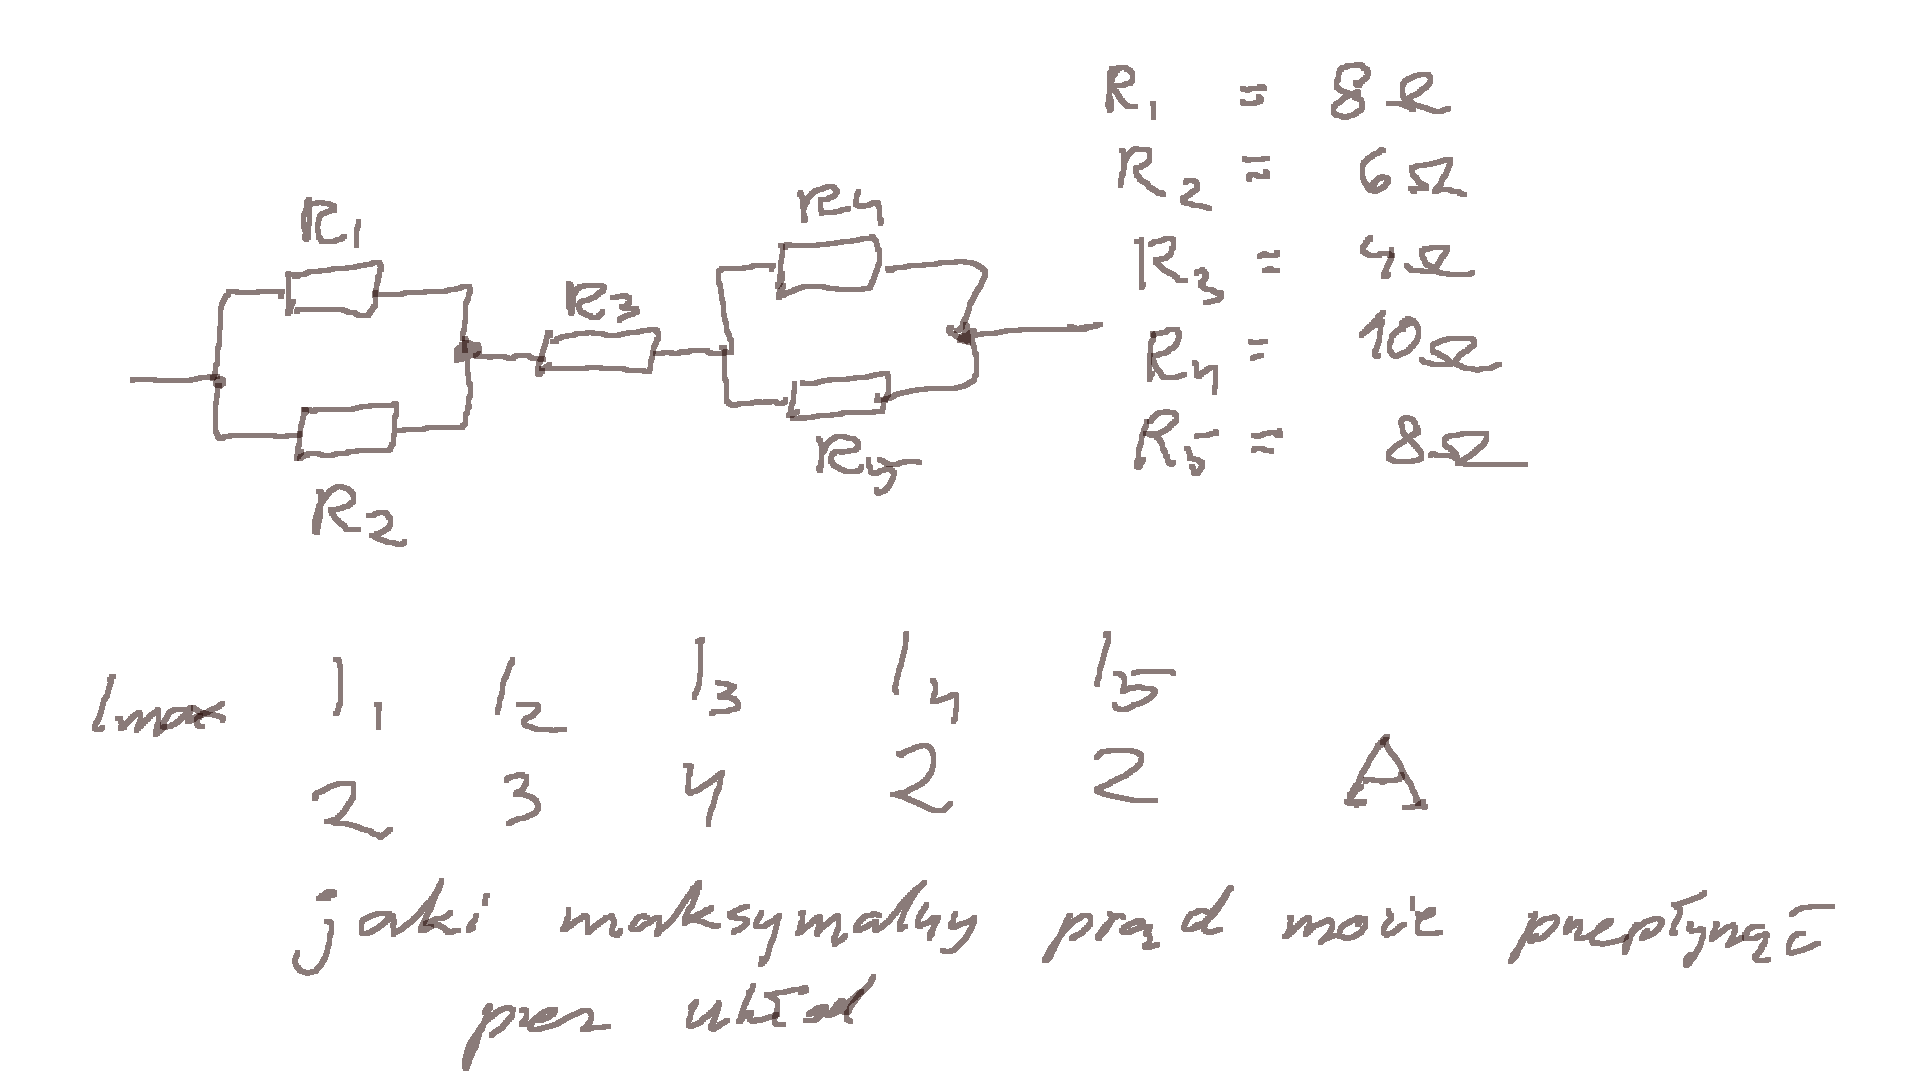

In [ ]:
R1 = 8
R2 = 6
R3 = 4
R4 = 10
R5 = 8

prob = LpProblem("Prad_max",LpMaximize)

# Zmienne naszego układu (prądy w poszcególnych gałęziach)
I1 = LpVariable("I1",0)
I2 = LpVariable("I2",0)
I3 = LpVariable("I3",0)
I4 = LpVariable("I4",0)
I5 = LpVariable("I5",0)

# Definicja głównego problemu dla którego rozwiązujemy przykład
prob += I3, "Prad_calkowity"

# więzy ograniczające maksymalne prądy w układzie
prob += I1 <= 2, "I1_max"
prob += I2 <= 3, "I2_max"
prob += I3 <= 4, "I3_max"
prob += I4 <= 2, "I4_max"
prob += I5 <= 2, "I5_max"

# Implementacja praw Kirchofa obowiązujących w naszym układzie
prob += I1 + I2 == I3, "prady_12_3"
prob += I4 + I5 == I3, "prady_3_45"
prob += I1 * R1 - I2 * R2 == 0, "oczko_1"
prob += I4 * R4 - I5 * R5 == 0, "oczko_2"

# Rozwiązywanie zaimplementowanego problemu
prob.writeLP("Prad_max.lp")
prob.solve()

print("Status: ", LpStatus[prob.status])

# wyświetlenie otrzymanych wyników
for v in prob.variables():
  print(v.name, "=",v.varValue, "A")

print("Prad_max = ", value(prob.objective), "A")

Status:  Optimal
I1 = 1.5428571 A
I2 = 2.0571429 A
I3 = 3.6 A
I4 = 1.6 A
I5 = 2.0 A
Prad_max =  3.6 A


Po zimplementowaniu problemu w powyższej postaci otrzymaliśy prawidłowę wyniki. 
Dzięki takiemy przedstawieniu problemu, możemy zmieniać parametry układu lub rozbudowywać do w zależności od naszych potrzeb. 

# zadanie 2
Problemem tego zadania było takie dobranie wartości rezystorów, aby moc rozproszenia, przy narzuconych wartościach napięć i prądów była jak najmniejsza.
Badany układ wyglądał następujaco:
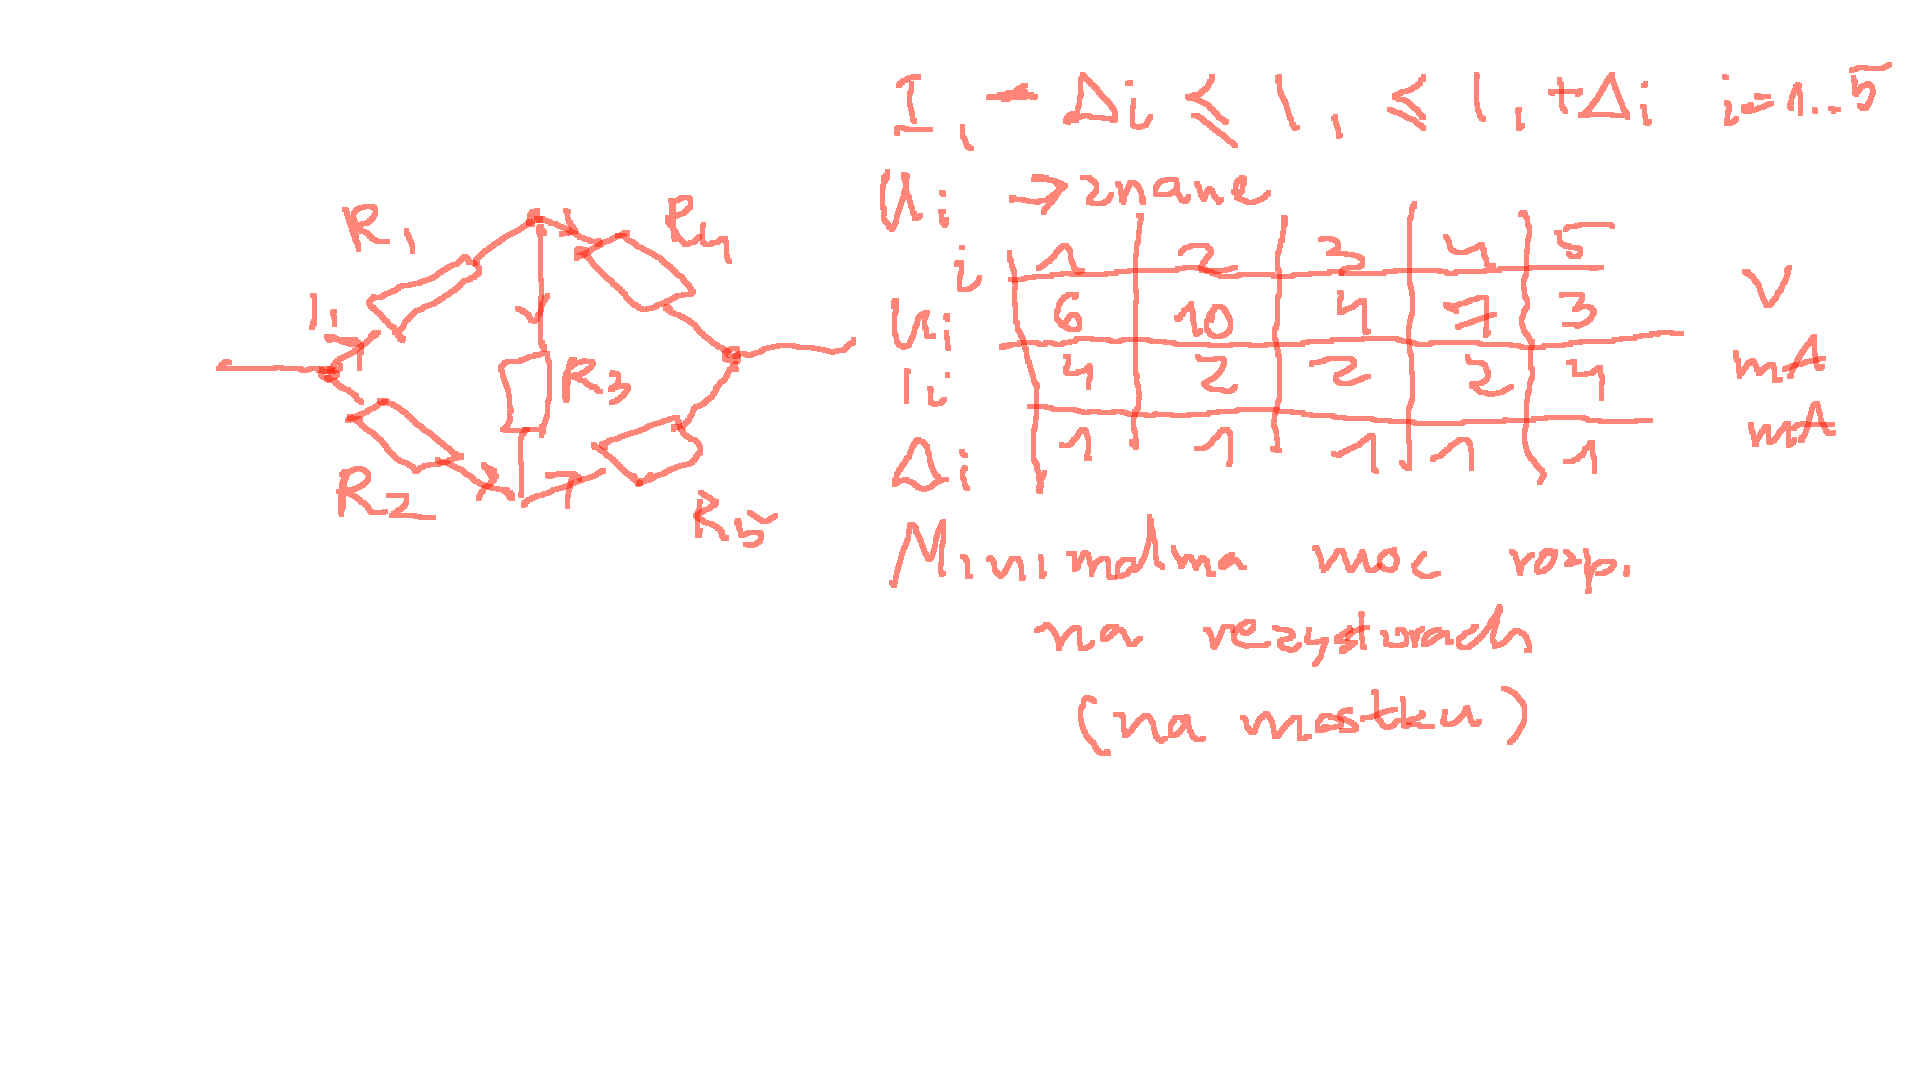

In [ ]:
U = [6, 10, 4, 7, 3]
R = [0,  0, 0, 0, 0]

dI = 1

prob = LpProblem("Mini_moc", LpMinimize)

# definicja zmiennych układu - prądy w poszczególnych gałęziach układu
I1 = LpVariable("I1",0.003,0.005)
I2 = LpVariable("I2",0.001,0.003)
I3 = LpVariable("I3",0.001,0.003)
I4 = LpVariable("I4",0.001,0.003)
I5 = LpVariable("I5",0.003,0.005)

# Definicja głównego problemu - obliczanie mocy strat
prob += (I1*U[0])+(I2*U[1])+(I3*U[2])+(I4*U[3])+(I5*U[4]), "moc strat"

# prądowe prawa Kirchofa
prob += I1 == I3 + I4
prob += I5 == I2 + I3

# Rozwiązywanie problemu
prob.writeLP("Mini_moc.lp")
prob.solve()

print("Status: ", LpStatus[prob.status])

# wyświetlanie wyników
for v in prob.variables():
  print(v, "=",(v.varValue), "A")

print("Moc_min = ", value(prob.objective), "W")

# obliczanie wartości rezystorów z wykorzystaniem obliczonych wcześniej wartości prądów
R[0] = (U[0]/I1.varValue)
R[1] = (U[1]/I2.varValue)
R[2] = (U[2]/I3.varValue)
R[3] = (U[3]/I4.varValue)
R[4] = (U[4]/I5.varValue)

for v in range(5):
  print("R",v+1,"=",R[v]," ohm")


Status:  Optimal
I1 = 0.003 A
I2 = 0.001 A
I3 = 0.002 A
I4 = 0.001 A
I5 = 0.003 A
Moc_min =  0.052000000000000005 W
R 1 = 2000.0  ohm
R 2 = 10000.0  ohm
R 3 = 2000.0  ohm
R 4 = 7000.0  ohm
R 5 = 1000.0  ohm


Problem został rozwiązany prawidłowo